In [102]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [103]:
mainfile = pd.read_csv('movie_data_complete.csv')


In [104]:
mainfile.head()

tmdb_id    imdb_id                     title       main_genre  \
0   284053  tt3501632            Thor: Ragnarok           Action   
1   441829  tt6599818         Team Thor: Part 2  Science Fiction   
2   429351  tt1413492                 12 Strong              War   
3   181808  tt2527336  Star Wars: The Last Jedi          Fantasy   
4   454648  tt6675400                   Con Man            Drama   

   movie_popularity release_date     revenue  vote_count  vote_average  \
0            56.176   10/25/2017   853977126        8498           7.5   
1             7.092    2/14/2017           0          86           7.3   
2            12.385    1/16/2018    62928960         946           5.3   
3            48.610   12/13/2017  1332459537        6811           7.1   
4             1.758    1/30/2018           0           3           5.0   

               mojo_key      ...      actor_imdb_id  director_id  \
0         thor:ragnarok      ...          nm1165110        55934   
1        teamthor:part2      ...          nm1165110        55934   
2              12strong      ...          nm1165110      1719601   
3  starwars:thelastjedi      ...          nm0000434        67367   
4                conman      ...          nm0000434      1985664   

   director_name_x director_birthday director_deathday  director_name_y  \
0    Taika Waititi         8/16/1975               NaN    Taika Waititi   
1    Taika Waititi         8/16/1975               NaN    Taika Waititi   
2  Nicolai Fuglsig               NaN               NaN  Nicolai Fuglsig   
3     Rian Johnson        12/17/1973               NaN     Rian Johnson   
4      Bruce Caulk               NaN               NaN      Bruce Caulk   

   director_gender director_popularity  director_imdb_id opening_total  
0                2               2.910         nm0169806   122744989.0  
1                2               2.910         nm0169806           NaN  
2                0               0.600               NaN    15815025.0  
3                2               1.463         nm0426059   220009584.0  
4                0               0.600               NaN           NaN  

[5 rows x 27 columns]

In [105]:
movie_gb = mainfile.groupby(['tmdb_id']) #groupby because we have some duplicate rows
global_totals = pd.DataFrame({
    "Movie" : movie_gb['title'].first(),
    'Genre' : movie_gb['main_genre'].first(),
    "Actor" : movie_gb['actor_name'].first(),
    "Actor Gender" : movie_gb['actor_gender'].first(),
    'Director' : movie_gb['director_name_x'].first(),
    'Director Gender' : movie_gb['director_gender'].first(),
    'Opening' : movie_gb['opening_total'].max()
})
global_totals = global_totals.dropna(how='any')
global_totals = global_totals.sort_values(['Opening'], ascending=False)
global_totals.head()

Movie      Genre              Actor  \
tmdb_id                                                                 
299536           Avengers: Infinity War  Adventure  Robert Downey Jr.   
181808         Star Wars: The Last Jedi    Fantasy        Mark Hamill   
284054                    Black Panther     Action   Chadwick Boseman   
321612             Beauty and the Beast     Family        Emma Watson   
351286   Jurassic World: Fallen Kingdom     Action        Chris Pratt   

         Actor Gender      Director  Director Gender      Opening  
tmdb_id                                                            
299536              2     Joe Russo                2  257698183.0  
181808              2  Rian Johnson                2  220009584.0  
284054              2  Ryan Coogler                2  202003951.0  
321612              1   Bill Condon                2  174750616.0  
351286              2  J. A. Bayona                2  148024610.0

In [107]:
genre_gb = global_totals.groupby(['Genre'])

<Figure size 432x288 with 0 Axes>

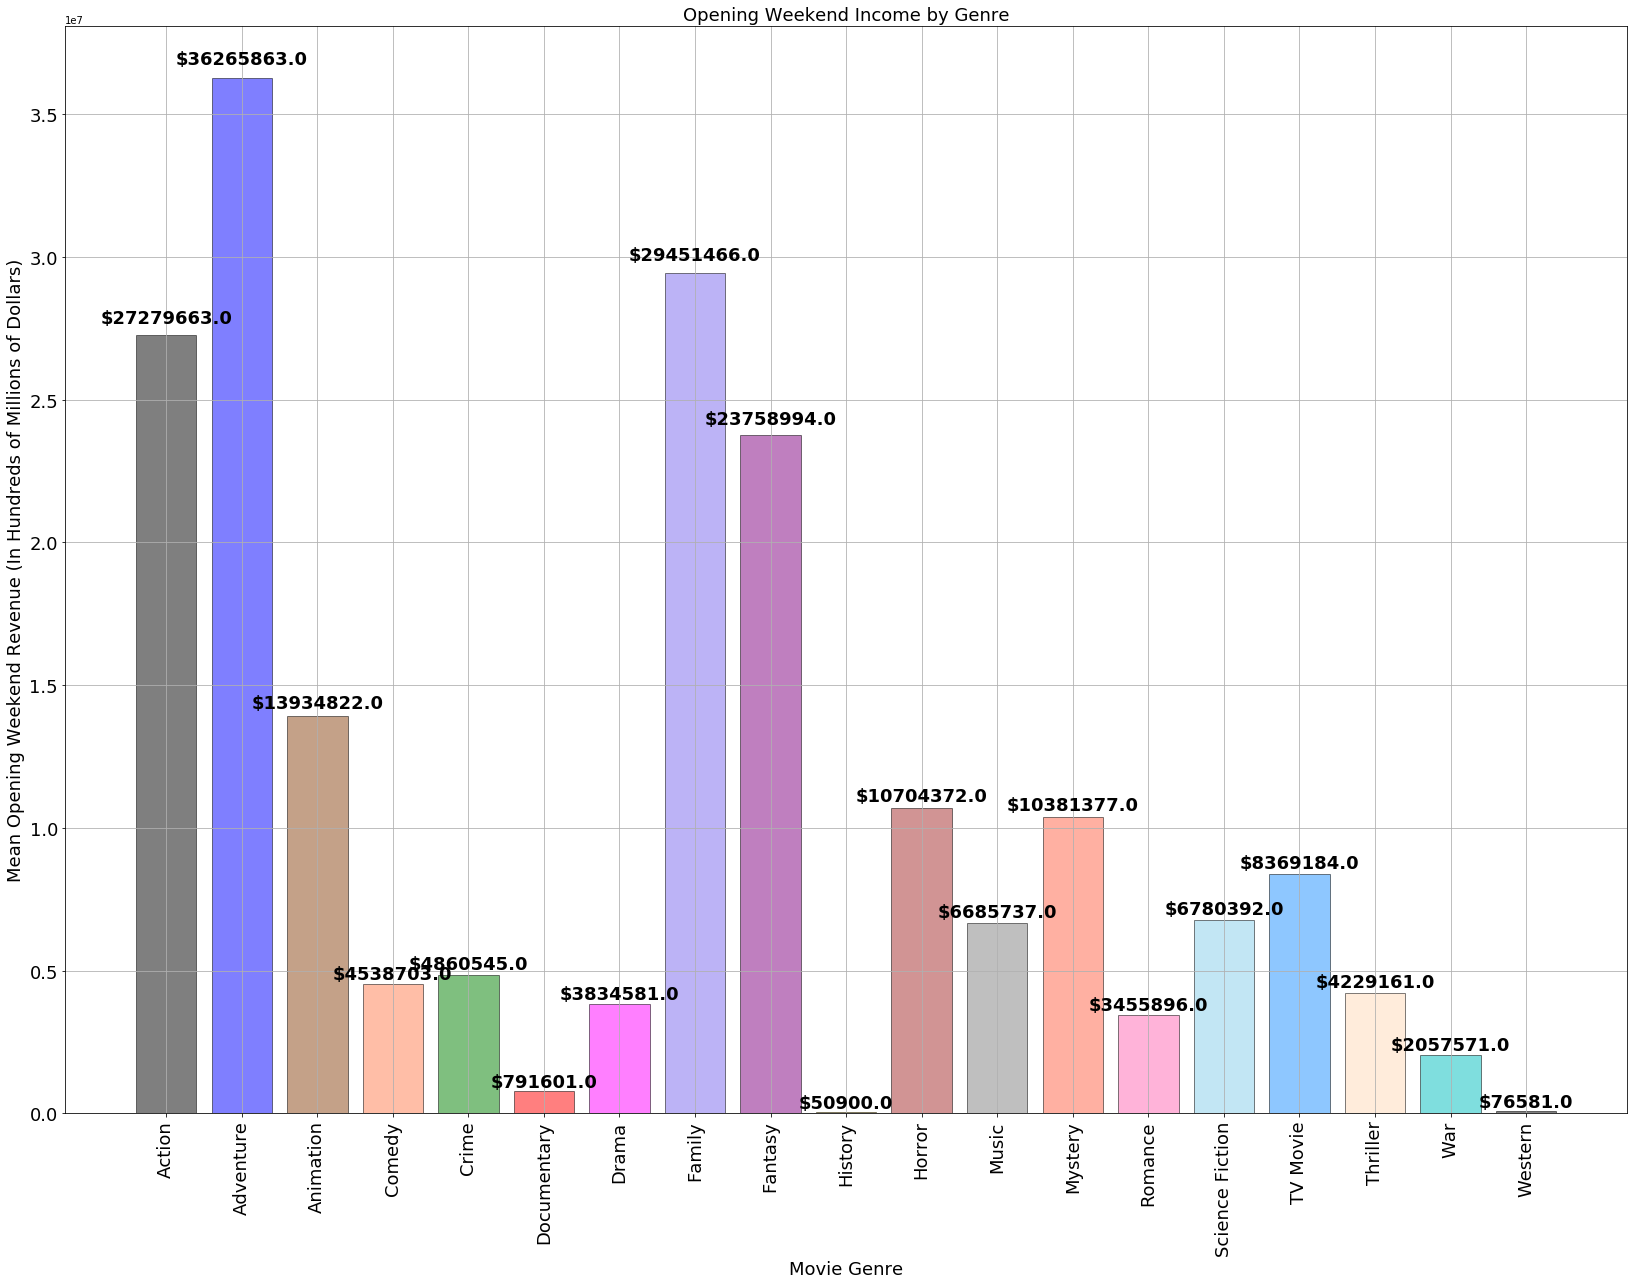

In [108]:
op_by_genre_df = pd.DataFrame({
    'Opening' : genre_gb['Opening'].mean()
})
op_by_genre_df = op_by_genre_df.reset_index()
op_by_genre = plt.figure()
plt.figure(figsize = (28,20))
#Aparna's color scheme from figure 4
bar = plt.bar(op_by_genre_df['Genre'],op_by_genre_df['Opening'], color = ['black','b','saddlebrown', 'coral', 'green', 'red', 'magenta',
                                'mediumslateblue','purple', 'gold','brown',
                                'grey', 'tomato','hotpink', 'skyblue','dodgerblue','peachpuff','c'],alpha=0.5, align="center", edgecolor = "black")
plt.title('Opening Weekend Income by Genre', fontsize = 18)

plt.xticks(rotation=90,fontsize=18)
plt.yticks(rotation=360,fontsize=18)
for rect in bar:
    height = rect.get_height()
    width = rect.get_width()
    text = str(round(height,2))
    plt.text(rect.get_x()+(width/2), rect.get_y()+(height*1.01), s='$'+ str(round(height,0)), ha='center', va='bottom', rotation = 'horizontal', fontsize=18, weight='bold')
    
plt.ylabel("Mean Opening Weekend Revenue (In Hundreds of Millions of Dollars)",fontsize=18)
plt.xlabel("Movie Genre",fontsize=18)
plt.ylim(ymin=0)
#plt.xlim((-1, len(op_by_genre_df["Genre"])+0.5))
plt.grid()
plt.savefig('Opening by Genre.png',bbox_inches='tight')